#데이터 : 
-산불 예측 (Forest Fires Data Set) </br>
#데이터 선정 이유 : 
-산불 피해 규모를 예측하고 대응할 수 있다. </br>
-자연을 보호하고 적절한 대응으로 추가 피해 확산을 방지한다. </br>
-새로운 column에 영향을 받을 가능성이 적다. (자연의 순리를 따르기 때문에 복잡도가 높지 않을 것으로 예상.)

In [ ]:
data 갯수 부족(517개). k-fold val 해도...  따라서 기각.  기각. 

In [ ]:
# """
#   잘한사람들꺼 봐도  지역 X, Y를 평면에 도식화해서 피해정도, 빈번함을 반경, 색 진하기로 표시한 것 말고는... 
#   그래서 area의 규모보다 산불 발생여부를 target으로 놓고 했는데 linear classification으로 확률이 50%나오면 어쩌자는거지... 
#   r2값은 0.0x 정도이고 데이터도 적어서 여태 배운 지식들 (cross val해도 나아지지가 않을 뿐더러) randomforest...등등을 사용할 수가 없다.
#   고로 느낀 점은, 현재는 여태 배운 지식을 익히는 것이 더 중요하기 때문에 kaggle competition에서 실제 수치를 객관화한 data를 바탕으로 분석하자.
#   ANN/MLP

#   무슨 다 data leakage 모델검증이지? model 만든 train data set으로 검증을 하고있어;;;
# """


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/MyDrive/forestfires.csv'
df = pd.read_csv(filename)
print(df.shape)
df.head()

# X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
# Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
# month - month of the year: "jan" to "dec"
# day - day of the week: "mon" to "sun"
# FFMC - FFMC index from the FWI system: 18.7 to 96.20    : 땅 속 쓰레기 및 기타 발화가능 물질(미세 연료)의 수분 함량.(높을수록 발화x)(http://aqua.upc.es/anywhere-catalogue-v2/?product=fine-fuel-moisture-code)
# DMC - DMC index from the FWI system: 1.1 to 291.3       : 지표층(표층 연료 층) 습도
# DC - DC index from the FWI system: 7.9 to 860.6         : 계절적인 가뭄정도
# ISI - ISI index from the FWI system: 0.0 to 56.10       : 초기 확산지수((Initial Spread Index) : 기온과 상대습도, 풍속, 강우량을 이용하여 얻은값.
# temp - temperature in Celsius degrees: 2.2 to 33.30
# RH - relative humidity in %: 15.0 to 100
# wind - wind speed in km/h: 0.40 to 9.40
# rain - outside rain in mm/m2 : 0.0 to 6.4
# area - the burned area of the forest (in ha): 0.00 to 1090.84
# (this output variable is very skewed towards 0.0, thus it may make
# sense to model with the logarithm transform).
# Missing Attribute Values: None

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
target = 'area'   ## area : 피해면적(규모), 단위 ha(1헥타르 = 10000제곱미터)

# from pandas_profiling import ProfileReport
# # !pip install --upgrade pandas

# # !pip install pandas-profiling[notebook]
# # !pip install -U pandas-profiling      ## update하기.
# report = ProfileReport(df)
# report    ## categorical 한 columns : Type, Method, Regionname, CouncilArea ; (4개)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


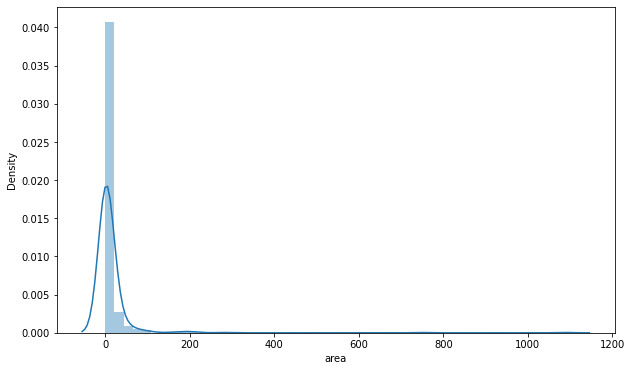

In [ ]:
## target분포 확인
from matplotlib import pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(df[target])      ## skewed된 값. -> log1p

In [ ]:
# np.percentile 사용해 이상치 제거
df = df[(df[target] >= np.percentile(df[target], 0.05)) & 
        (df[target] <= np.percentile(df[target], 99.5))]

In [ ]:
# target_log = np.log1p(df[target])   ## log1p= ln(1 + x)  ;  np.log(df[target]+1)

# df['area_log'] = target_log
# sns.histplot(target_log);
# plt.axvline(df['area_log'].median(), color='red');    ## 변환해도 target이 skewed된 분포이기 때문에, 정규분포에 가깝도록 median을 기준라인으로 잡겠습니다.
# plt.axvline(df['area_log'].mean(), color='blue')
# print(df['area_log'].median())

In [ ]:
# target = 'area_log'
# df = df.drop(columns=['area'])    ## target의 최대 최소 분포 차가 너무 커서 log값을 씌워 차이를 완화해줌.

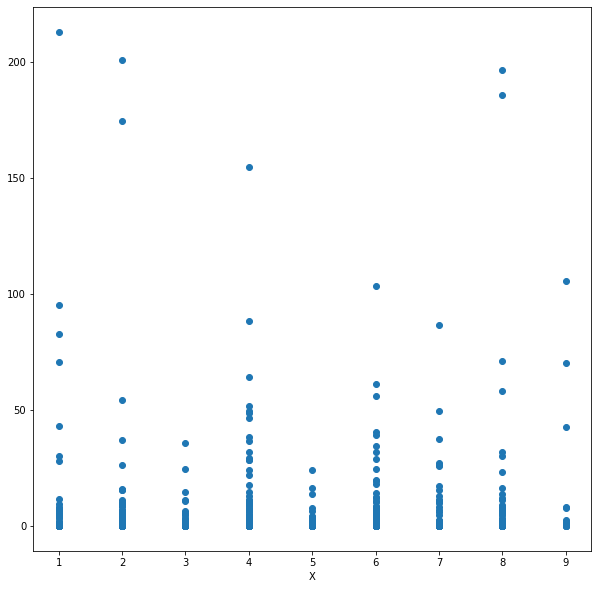

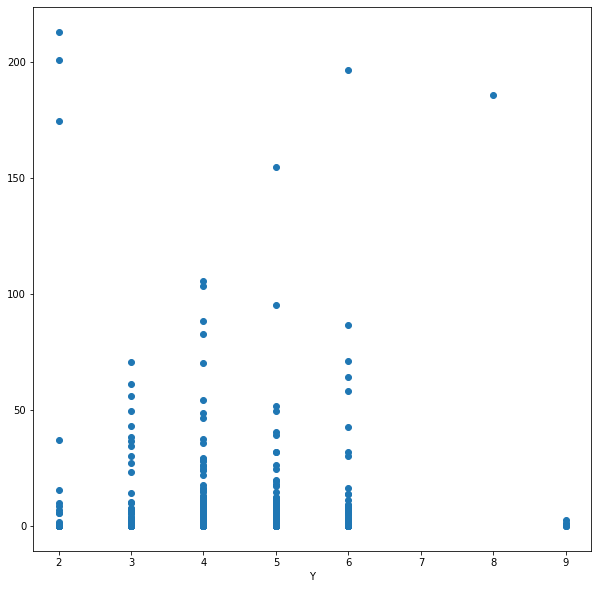

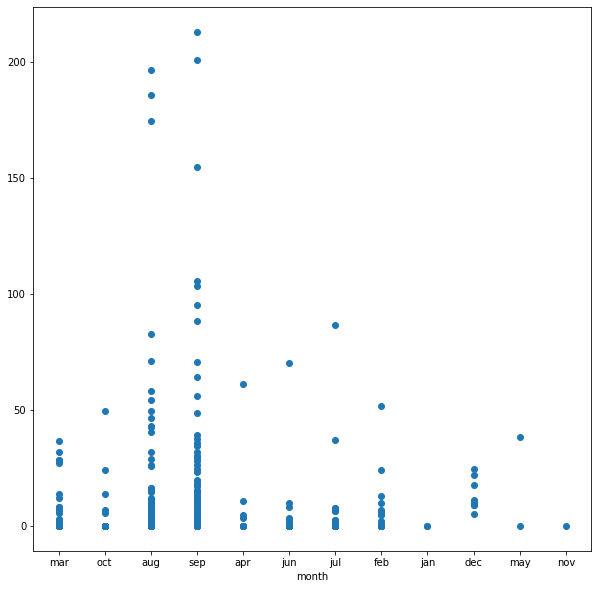

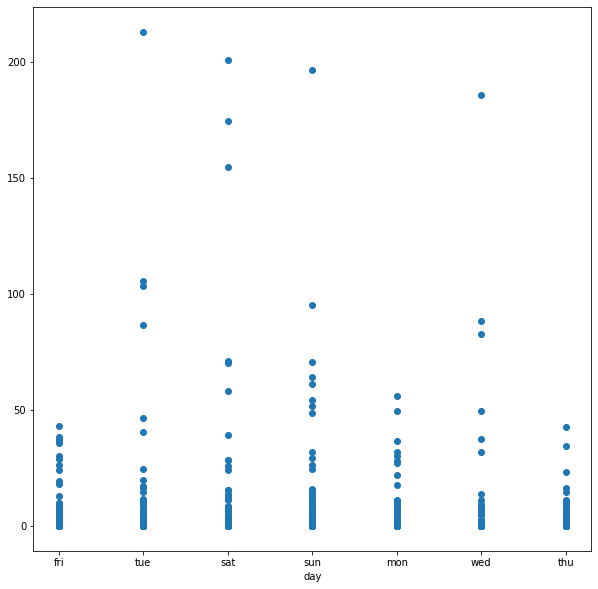

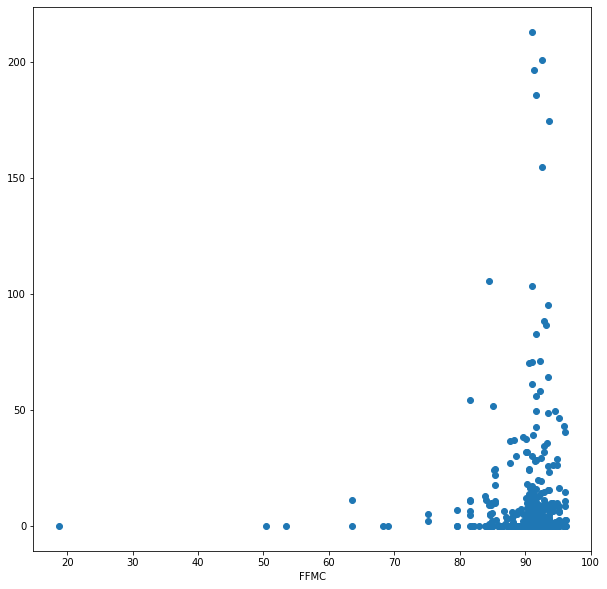

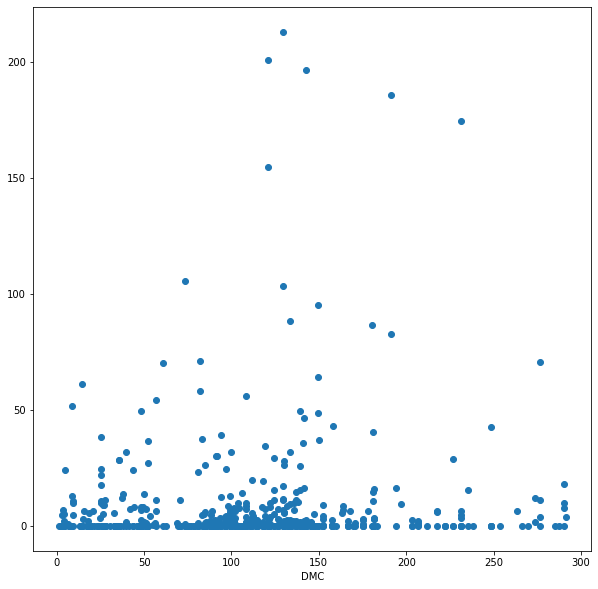

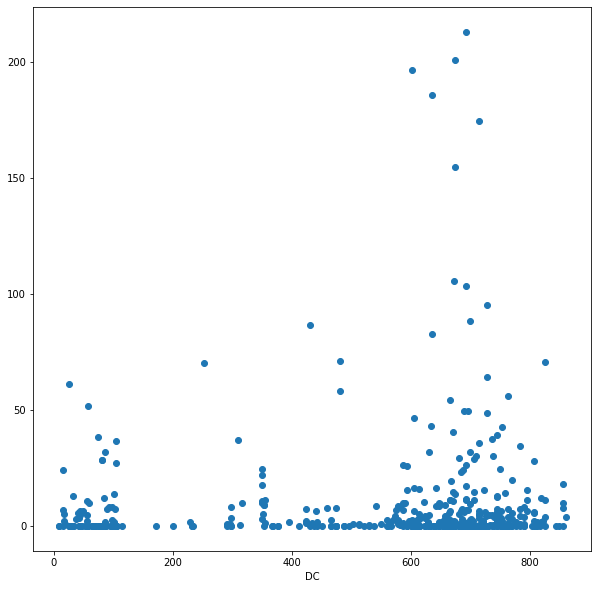

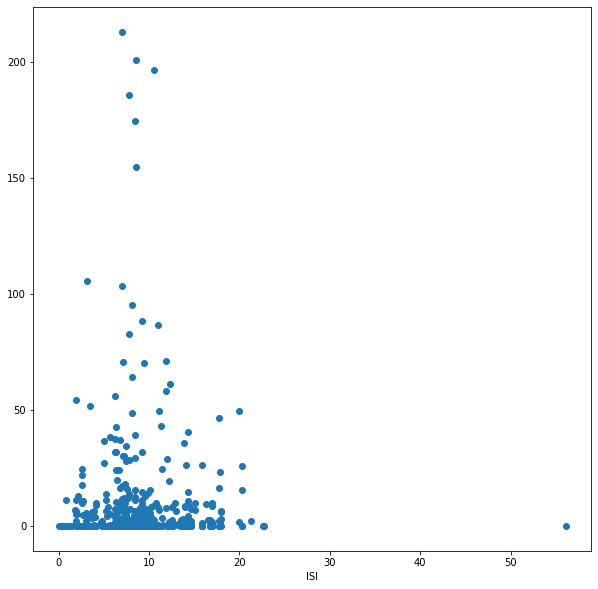

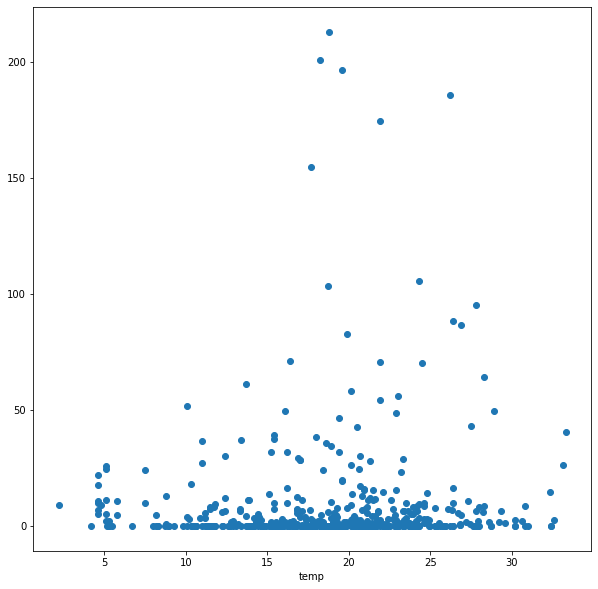

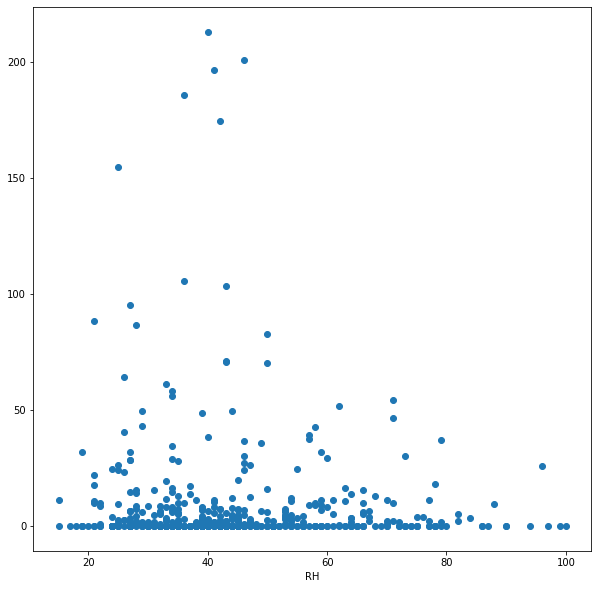

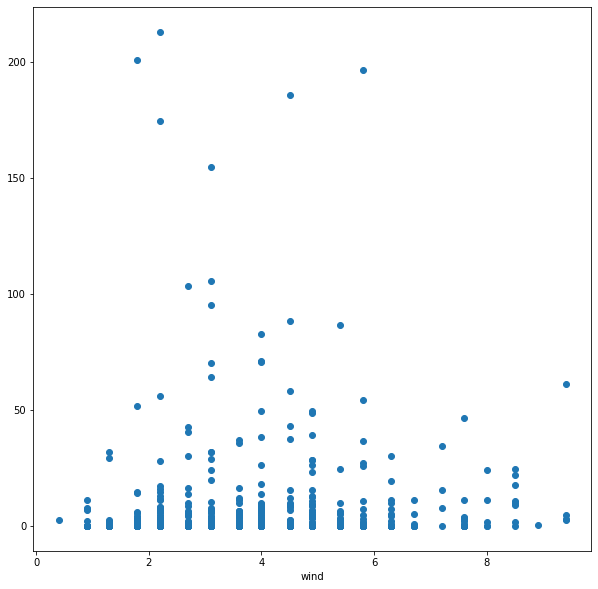

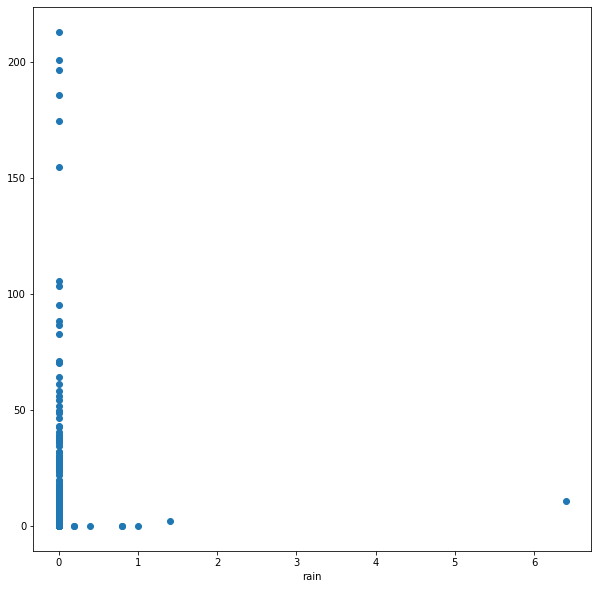

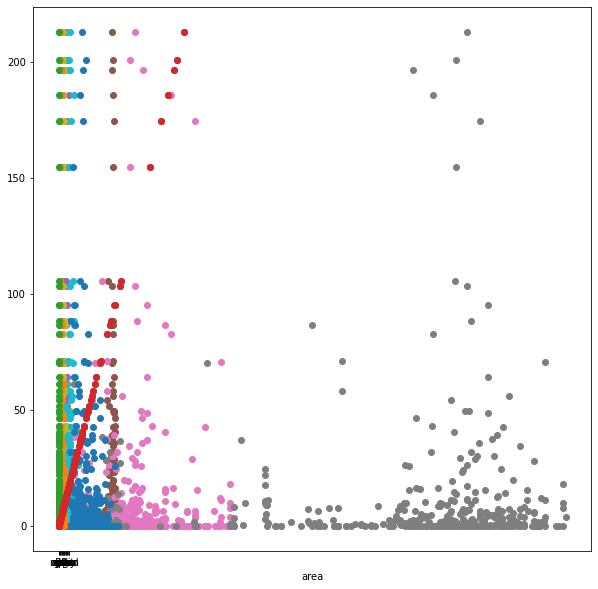

In [ ]:
## target과 feature간 상관관계 확인.

df.corr().iloc[:,-1].sort_values(ascending = False)

for i in df.columns:
  f, ax = plt.subplots(figsize=(10,10))
  plt.xlabel(i)
  ax.scatter(df[i], df[target])

for i in df.columns:
  plt.scatter(df[i], df[target])

In [ ]:
# sns.set(style='whitegrid', context='notebook')
# sns.pairplot(df.columns, height=2)

In [ ]:
## 각 column data 확인.
for i in df.columns:
  print(i, df[i].unique())

X [7 8 6 5 4 2 9 1 3]
Y [5 4 6 3 2 9 8]
month ['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
day ['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']
FFMC [86.2 90.6 91.7 89.3 92.3 91.5 91.  92.5 92.8 63.5 90.9 92.9 93.3 84.9
 89.2 86.3 91.8 94.3 90.2 93.5 91.4 92.4 93.4 88.6 90.3 90.  88.1 79.5
 94.8 90.1 94.2 87.2 87.6 92.1 92.6 84.  86.6 93.  91.1 91.2 88.8 84.2
 89.7 83.9 69.  82.1 85.9 84.4 68.2 93.7 85.8 95.5 95.2 96.  85.6 81.5
 86.8 93.9 90.8 90.7 88.3 92.2 81.9 88.  83.  93.1 91.9 91.6 87.5 93.6
 84.6 85.4 84.7 86.9 85.2 90.4 53.4 85.1 89.6 50.4 88.2 92.  18.7 90.5
 84.1 85.  87.9 94.6 87.1 92.7 88.9 89.4 94.  75.1 91.3 93.2 94.9 95.
 95.1 95.8 95.9 96.2 96.1 94.5 81.6 94.4]
DMC [ 26.2  35.4  43.7  33.3  51.3  85.3  88.9 145.4 129.5  88.   73.2  70.8
 126.5 133.3 141.2  35.8  32.8  27.9  27.4  78.5  96.3 110.9 139.4 142.4
 117.9 149.3  85.1  91.8  69.7  75.6  80.7  41.5  25.7  60.6  96.9 108.3
  82.9  62.3  23.9  52.2 137.   99.6 111.2 114.3  46.5   9.3  13.2

In [ ]:
## train, val, test split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.80, test_size=0.20, random_state=2)
# train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=2)

In [ ]:
# 특성공학
def engine(df):
  df = df.copy()
  df = df.drop(columns=['X','Y'], axis=1)

  
  ## target을 면적이 아니라 발생여부로.
  # df[target] = df[target].apply(lambda x: 1 if x > 0 else 0)

  return df

train = engine(train)
# val = engine(val)
test = engine(test)

In [ ]:
## X, y split

feature = train.drop(columns=[target]).columns     ##target = area_log
# feature = 'temp'  ##ISI, temp, wind

X_train = train[feature]
y_train = train[target]
# X_val = val[feature]
# y_val = val[target]
X_test = test[feature]
y_test = test[target]

print(len(df), len(X_train), len(X_test))

514 411 103


In [ ]:
## modeling

# !pip install category_encoders
from category_encoders import OrdinalEncoder
from sklearn.model_selection import cross_val_score
# from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error

ordinal_cols_mapping = [
    {"col": "month",
    "mapping": {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}},
    {"col": "day",
    "mapping": {'mon':1, 'tue':2, 'wed': 3, 'thu':4, 'fri':5, 'sat':6, 'sun':7}}
]

pipe = make_pipeline(
    OrdinalEncoder(mapping = ordinal_cols_mapping, return_df = True),
    # SimpleImputer(strategy='mean'), 
    # StandardScaler(),
    # SelectKBest(f_regression, k=20),
    RandomForestRegressor(max_depth=10)
    # DecisionTreeRegressor()
    # LogisticRegression()
)

# k = 3
# scores = cross_val_score(pipe, X_train, y_train, cv=k, scoring='neg_mean_absolute_error')
# print(f'MAE ({k} folds):', -scores)

pipe.fit(X_train, y_train)
# print('검증 정확도: ', pipe.score(X_val, y_val))
print(pipe.score(X_train, y_train))

0.8243741216709036


In [ ]:
## r2 score말고도 explained_variance_score가 있다.

# from sklearn.metrics import explained_variance_score
# yy=pipe.predict(X_train)
# score = explained_variance_score(y_train, yy)

In [ ]:
# depth = range(1, 30, 2)

# ts, vs = validation_curve(
#     pipe, X_train, y_train
#     , param_name='decisiontreeregressor__max_depth'
#     , param_range=depth, scoring='neg_mean_absolute_error'
#     , cv=3
#     , n_jobs=-1
# )

# train_scores_mean = np.mean(-ts, axis=1)
# validation_scores_mean = np.mean(-vs, axis=1)

# fig, ax = plt.subplots()

# # 훈련세트 검증곡선
# ax.plot(depth, train_scores_mean, label='training error')

# # 검증세트 검증곡선
# ax.plot(depth, validation_scores_mean, label='validation error')

# # 이상적인 max_depth
# ax.vlines(5,0, train_scores_mean.max(), color='blue')

# # 그래프 셋팅
# ax.set(title='Validation Curve'
#       , xlabel='Model Complexity(max_depth)', ylabel='MAE')
# ax.legend()
# fig.dpi = 100

In [ ]:
pipe.named_steps

{'ordinalencoder': OrdinalEncoder(cols=['month', 'day'], drop_invariant=False,
                handle_missing='value', handle_unknown='value',
                mapping=[{'col': 'month',
                          'mapping': {'apr': 4, 'aug': 8, 'dec': 12, 'feb': 2,
                                      'jan': 1, 'jul': 7, 'jun': 6, 'mar': 3,
                                      'may': 5, 'nov': 11, 'oct': 10,
                                      'sep': 9}},
                         {'col': 'day',
                          'mapping': {'fri': 5, 'mon': 1, 'sat': 6, 'sun': 7,
                                      'thu': 4, 'tue': 2, 'wed': 3}}],
                return_df=True, verbose=0),
 'randomforestregressor': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_le

In [ ]:
y_test_base = np.empty(len(df))

# y_test_base.fill(df[target].median())   ## 회귀
y_test_base.fill(int(df[target].mode()))        ##분류

print(pipe.score(df[feature], y_test_base))
print(pipe.score(X_test,y_test))

0.0
-0.1706973620072958


In [ ]:
print("Linear Classification Accuracy: {:.2f}%".format(pipe.score(X_test, y_test) * 100))

Linear Classification Accuracy: -17.07%


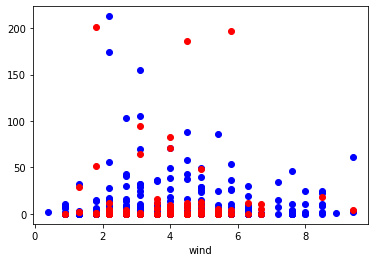

In [ ]:
i='wind'
# f, ax = plt.subplots(figsize=(2,2))
plt.xlabel(i)
plt.scatter(train[i], train[target], color='b')
plt.scatter(test[i], test[target], color='r')